In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# iris.target
# iris.target_names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris_data = iris.data
iris_label = iris.target
iris_df = pd.DataFrame(data=iris_data,columns = iris.feature_names)
iris_df['label']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris_df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [14]:
# 학습용 검증 데이터 분리1
X_train, X_test, y_train, y_test = train_test_split(iris_data,iris_label,test_size=0.2,random_state=11)

In [15]:
X_train.shape
print(y_train.shape)

(120,)


In [16]:
# DT 객체생성
dt_clf = DecisionTreeClassifier()

# 학습 수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
# 학습이 완료된 DT 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

In [19]:
accuracy_score(y_test,pred)

0.9333333333333333

교차 검증
- K Fold
- Startified K 
- corss_val_score

In [24]:
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트롤 분리
kfold = KFold(n_splits=5)
cv_accuracy = []

n_iter = 0
for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index],features[test_index]
    y_train, y_test = label[train_index],label[test_index]
    
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f'{n_iter}회차, 정확도: {accuracy}, 학습용 데이터: {train_size}, 검증용 데이터: {test_size}')
    print(f'{n_iter}회차 검증세트 인덱스: {test_index}')
    cv_accuracy.append(accuracy)
    
print(f'평균 검증 정확도: {np.mean(cv_accuracy)}')
    

1회차, 정확도: 1.0, 학습용 데이터: 120, 검증용 데이터: 30
1회차 검증세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
2회차, 정확도: 0.9667, 학습용 데이터: 120, 검증용 데이터: 30
2회차 검증세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
3회차, 정확도: 0.8667, 학습용 데이터: 120, 검증용 데이터: 30
3회차 검증세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
4회차, 정확도: 0.9333, 학습용 데이터: 120, 검증용 데이터: 30
4회차 검증세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5회차, 정확도: 0.7333, 학습용 데이터: 120, 검증용 데이터: 30
5회차 검증세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정확도: 0.9


In [25]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [26]:
kfold = KFold(n_splits=3)
n_iter=0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f'{n_iter}회차 교차검증')
    print(f'학습 레이블 데이터 분포:\n {label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포:\n {label_test.value_counts()}')

1회차 교차검증
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
2회차 교차검증
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
3회차 교차검증
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [27]:
# stratifiedKFold는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게
# 학습과 검증 데이터 세트를 분배함
from sklearn.model_selection import StratifiedKFold

iris_df_id = iris_df.drop(['label'],axis=1)
skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index,test_index in skf.split(iris_df,iris_df['label']):
# for train_index,test_index in skf.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f'{n_iter}회차 교차검증')
    print(f'학습 레이블 데이터 분포:\n {label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포:\n {label_test.value_counts()}')

1회차 교차검증
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
2회차 교차검증
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
3회차 교차검증
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


### [과제] 상기 케이스에 대한 교차 검증을 아래와 같이 수행
- 각 회차별 교차 검증 정확도 및 검증 세트 인덱스
- 평균 검증 정확도

In [28]:
# cross_val_score() : 교차 검증을 보다 간편하게
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf,data,label,scoring = 'accuracy',cv=3)

In [30]:
from sklearn.model_selection import GridSearchCV

iris_data = load_iris()
X_train, X_test, y_train,y_test = train_test_split(iris_data.data, iris_data.target,
                                                  test_size=0.2,random_state=121)

dtree = DecisionTreeClassifier()
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}
grid_dtree = GridSearchCV(dtree,param_grid=parameters,cv=3,refit=True)

grid_dtree.fit(X_train,y_train)
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1


In [31]:
print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:',grid_dtree.best_score_)

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.975


In [32]:
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print(f'테스트 데이터 정확도:{accuracy_score(y_test,pred)}')

테스트 데이터 정확도:0.9666666666666667


In [33]:
# 데이터 인코딩 
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자랜지','컴퓨터','선풍기','믹서','믹서']
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
print(f'인코딩 반환값: {labels}')

인코딩 반환값: [0 1 4 5 3 2 2]


In [34]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자랜지', '컴퓨터'], dtype='<U4')

In [35]:
# 원핫인코딩
from sklearn.preprocessing import OneHotEncoder

items = ['TV','냉장고','전자랜지','컴퓨터','선풍기','믹서','믹서']
# 먼저 숫자값으로 변환
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
labels = labels.reshape(-1,1)
labels
oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
oh_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [36]:
df = pd.DataFrame({'item':items})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자랜지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0


In [37]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [46]:
# 피처 스케일링과 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

iris_scaled = scaler.fit_transform(iris_df)
iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris_df.columns)
display(iris_scaled_df.head())
print(f'평균: {iris_scaled_df.mean()}\n')
print(f'분산: {iris_scaled_df.var()}')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745


평균: sepal length (cm)   -2.775558e-16
sepal width (cm)    -9.695948e-16
petal length (cm)   -8.652338e-16
petal width (cm)    -4.662937e-16
label                1.184238e-17
dtype: float64

분산: sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
label                1.006711
dtype: float64


In [47]:
# [과제] iris_df를 정규화 수행 결과와 최대값, 최소값을 출력하세요
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_df)#여기서는 최댓값과 최솟값을 계산
iris_scaled = scaler.transform(iris_df)#각 피쳐의 값들에 맞게 정규화/표준화 과정을 거친다.

iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris_df.columns)
print('feature들의 최솟값')
print(iris_scaled_df.min())
print('\nfeature들의 최댓값')
print(iris_scaled_df.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
label                0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
label                1.0
dtype: float64


[과제] train.csv 데이터로 생존자 분석 예측을 위한 분석용 데이터셋을 하나의 전처리 사용자 함수를 이용하여 작성한 후 모델링 및 성능 평가를 수행하세요. 단(전처리는 5개 이상, 시각적 탐색 3개 이상, 정확도는 0.85 이상)

In [143]:
t_df=pd.read_csv('./dataset/train.csv')

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('./dataset/train.csv')

# df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
# stat_min = 10
#     # print(t_df['Title'].value_counts())
# title_names = (df['Title'].value_counts() < stat_min) # 10개 이하의 타이틀을 모두 뽑아냄
# df['Title'] = df['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

def transform_features(df):
    #결손값처리
    df['Cabin'].fillna('A', inplace=True)
    df['Embarked'].fillna('S', inplace=True)
    df['Family'] = df['Parch'] + df['SibSp']
    
    df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    stat_min = 10
    title_names = (df['Title'].value_counts() < stat_min) # 10개 이하의 타이틀을 모두 뽑아냄
    df['Title'] = df['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    
    #컬럼삭제
    df.drop(['PassengerId', 'Name', 'Ticket','SibSp','Parch','Fare','Age'], axis=1, inplace=True)
    
    #인코딩
    col = ['Cabin', 'Sex','Embarked','Title','Family']
    df['Cabin'] = df['Cabin'].str[:1]
    for f in col:
        le = LabelEncoder() 
        le.fit(df[f])
        df[f] = le.transform(df[f])
        
        
    return df

transform_features(df)


,Survived,Pclass,Sex,Cabin,Embarked,Family,Title
0,0,3,1,0,2,1,3
1,1,1,0,2,0,1,4
2,1,3,0,0,2,0,2
3,1,1,0,2,2,1,4
4,0,3,1,0,2,0,3
...,...,...,...,...,...,...,...
886,0,2,1,0,2,0,1
887,1,1,0,1,2,0,2
888,0,3,0,0,2,3,2
889,1,1,1,2,0,0,3


In [126]:
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_df = df['Survived'] # 종속변수
X_df = df.drop('Survived',axis=1) # 독립변수

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train,X_test, y_train,y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)

print(X_train.shape)
print(X_test.shape)

(712, 6)
(179, 6)


In [137]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print(f'rf 정확도 : {accuracy_rf}, lr 정확도 : {accuracy_lr}')

rf 정확도 : 0.82, lr 정확도 : 0.87


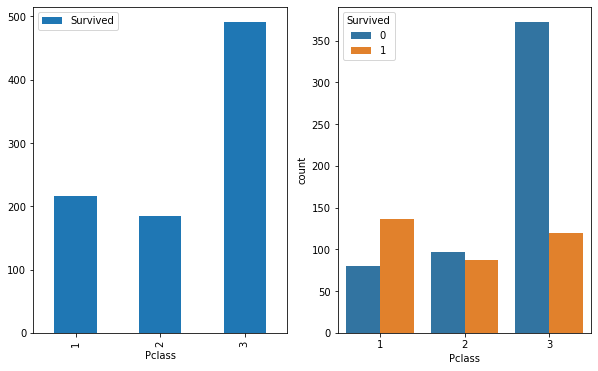

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(1,2,figsize=(10,6))
bar = t_df[['Pclass','Survived']].groupby(['Pclass']).count().plot.bar(ax=ax[0])
bar2 = sns.countplot(hue='Survived',x='Pclass',data=t_df)
plt.show()

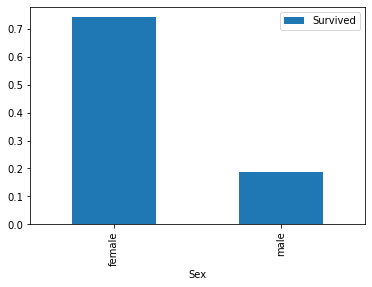

In [145]:
bar = t_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.show()

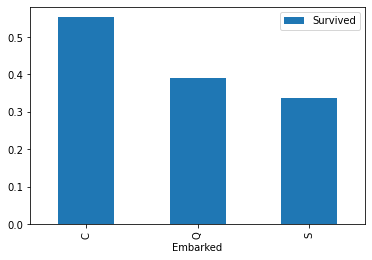

In [146]:
bar = t_df[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar()
plt.show()